# Import libraries

In [1]:
import pandas as pd                    # For data manipulation and analysis
import seaborn as sns                 # For enhanced statistical visualizations
import matplotlib.pyplot as plt        # For plotting
from scipy.stats import f_oneway, kruskal

# Define CountrySolarData class

In [2]:
class CountrySolarData:
    def __init__(self, name, filepath):
        """ Constructor: Initializes a CountrySolarData object.
              Parameters:
                - name (str): The name of the country (e.g., 'Benin').
                - filepath (str): Path to the cleaned CSV file containing the country's solar data.
        """
        self.name = name
        self.filepath = filepath
        self.data = self.load_data()  # Load and store the cleaned dataset

    def load_data(self):
        """ Loads the dataset from the provided CSV file and adds a 'Country' column to identify the source country in combined analyses.
              Returns:
                 - DataFrame with solar data and a 'Country' column.
        """
        df = pd.read_csv(self.filepath)
        df["Country"] = self.name  # Label the data with the country name
        return df

    def get_metric(self, metric):
        """ Extracts a specific metric column (e.g., 'GHI', 'DNI', or 'DHI') with NaN values dropped.
              Parameters:
                - metric (str): The name of the metric column to extract.
              Returns:
                - Series containing the metric values with missing values removed.
        """
        return self.data[metric].dropna()

# Define SolarDataAnalyzer class

In [11]:
class SolarDataAnalyzer:
    def __init__(self, country_datasets):
        # Constructor: Initializes the analyzer with a list of country datasets
        # and combines their data into a single DataFrame for analysis.
        self.countries = country_datasets
        self.df = self.combine_data()

    def combine_data(self):
        # Combines the data from all countries into one DataFrame.
        # Useful for collective analysis across countries.
        return pd.concat([country.data for country in self.countries], ignore_index=True)

    def plot_boxplots(self, metrics=["GHI", "DNI", "DHI"]):
        # Plots boxplots for the specified metrics to show distribution across countries.
        # This helps visualize differences in central tendency and spread.
        for metric in metrics:
            plt.figure(figsize=(8, 6))
            sns.boxplot(data=self.df, x="Country", y=metric, hue="Country", palette="Set2", legend=False)
            plt.title(f"{metric} Distribution by Country")
            plt.show()

    def summary_statistics(self):
        # Generates and displays summary statistics (mean, median, std)
        # for GHI, DNI, and DHI grouped by country.
        summary = self.df.groupby("Country")[["GHI", "DNI", "DHI"]].agg(["mean", "median", "std"])
        display(summary.round(2))  # Round results for readability

    def perform_anova(self, metric="GHI"):
        # Performs a one-way ANOVA test to determine if there are statistically
        # significant differences in the specified metric across countries.
        data = [country.get_metric(metric) for country in self.countries]
        result = f_oneway(*data)
        print(f"ANOVA p-value for {metric}: {result.pvalue:.4f}")

    def perform_kruskal(self, metric="GHI"):
        # Performs the Kruskal-Wallis test (non-parametric alternative to ANOVA)
        # to assess statistical differences in the specified metric across countries.
        data = [country.get_metric(metric) for country in self.countries]
        result = kruskal(*data)
        print(f"Kruskal–Wallis p-value for {metric}: {result.pvalue:.4f}")

    def plot_avg_ghi_bar(self):
        # Plots a bar chart of average GHI for each country.
        # Useful for comparing overall solar potential.
        avg_ghi = self.df.groupby("Country")["GHI"].mean().sort_values(ascending=False)
        avg_ghi.plot(kind="bar", color="skyblue", title="Average GHI by Country", figsize=(6, 4))
        plt.ylabel("Average GHI")
        plt.show()


# Create objects and analyze

###  Instantiate country objects

In [13]:
benin = CountrySolarData("Benin", "../data/benin_clean.csv")
sierra_leone = CountrySolarData("Sierra Leone", "../data/sierraleone_clean.csv")
togo = CountrySolarData("Togo", "../data/togo_clean.csv")


### Analyzer instance

In [14]:
analyzer = SolarDataAnalyzer([benin, sierra_leone, togo])

# Run analysis

#  Boxplots for GHI, DNI, DHI

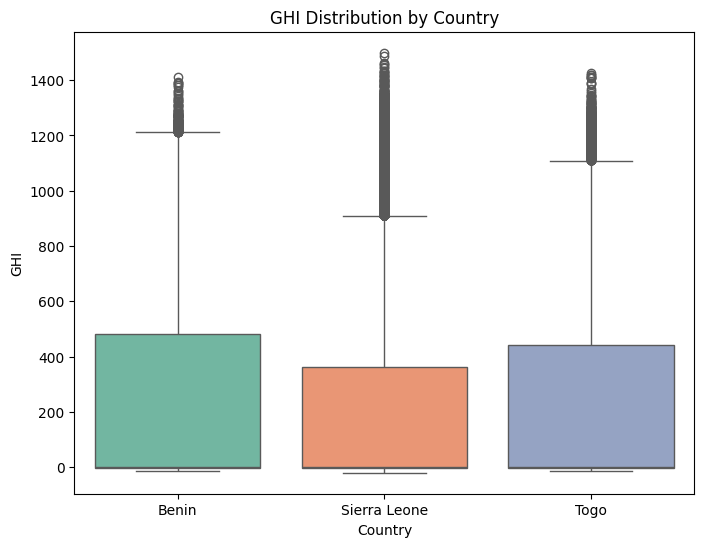

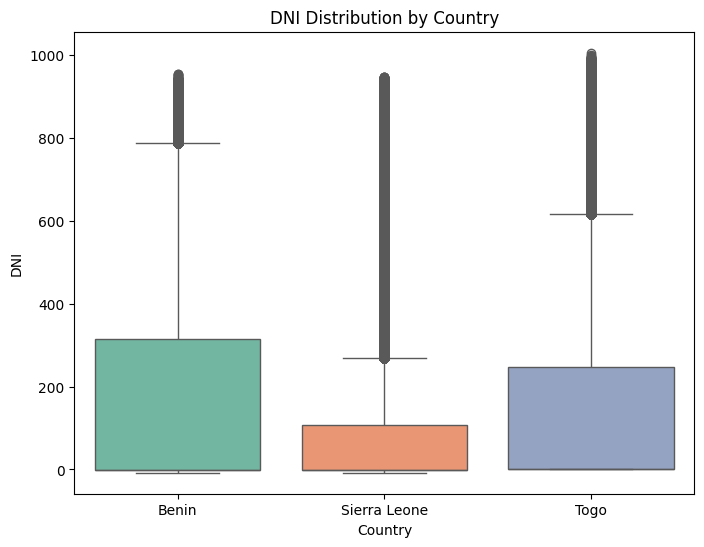

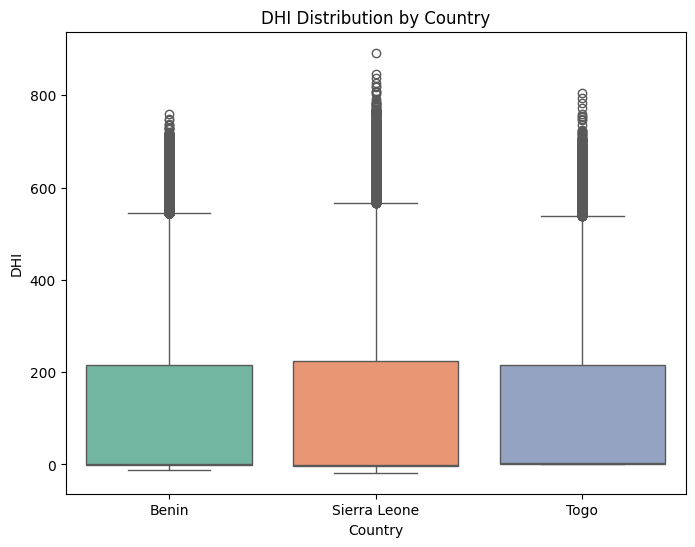

In [15]:
analyzer.plot_boxplots()

# Summary Table (Mean, Median, Standard Deviation)

In [16]:
analyzer.summary_statistics()

GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         240.56    1.8  331.13  167.19   -0.1  261.71  115.36    1.6   
Sierra Leone  201.96    0.3  298.50  116.38   -0.1  218.65  113.72   -0.1   
Togo          230.56    2.1  322.53  151.26    0.0  250.96  116.44    2.5   

                      
                 std  
Country               
Benin         158.69  
Sierra Leone  158.95  
Togo          156.52

# One-Way ANOVA Test

In [17]:
analyzer.perform_anova()

ANOVA p-value for GHI: 0.0000


# Kruskal-Wallis Test

In [18]:
analyzer.perform_kruskal()

Kruskal–Wallis p-value for GHI: 0.0000


# Bar Chart of Average GHI

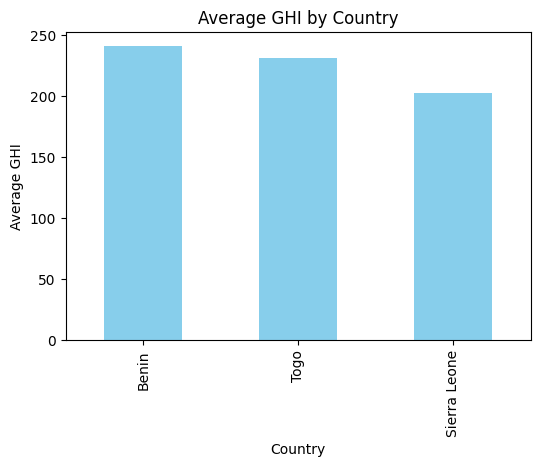

In [19]:
analyzer.plot_avg_ghi_bar()

# Key Observations


- Togo shows the highest median GHI and the least variability, indicating consistent solar potential.
- Benin exhibits moderate solar potential with wider GHI variability.
- Sierra Leone has the lowest mean GHI, suggesting comparatively lower solar energy availability.
